In [2]:
import numpy as np

In [4]:
import math

In [6]:
import matplotlib.pylab as plt

In [7]:
from struct import unpack

In [9]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [11]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [16]:
images,labels= loadmnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')

In [21]:
images.shape

(60000, 784)

In [24]:
labels.shape

(60000,)

In [31]:
train_images = images[0:50000]

In [39]:
train_labels = labels[0:50000]

In [40]:
train_images.shape

(50000, 784)

In [57]:
train_labels.shape

(50000,)

In [43]:
test_images = images[50000:60000]

In [49]:
test_labels = labels[50000:60000]

In [47]:
test_images.shape

(10000, 784)

In [51]:
test_labels.shape

(10000,)

In [70]:
def filterTrainingDataByClass(klass):
    igs = [];
    for i, image in enumerate(train_labels):
        if(train_labels[i] == klass):
            igs.append(train_images[i]);
    igs = np.matrix(igs);
    return igs;

In [53]:
type(train_labels)

numpy.ndarray

In [71]:
v = filterTrainingDataByClass(0);    

In [73]:
v.shape

(4932, 784)

In [75]:
mean = np.array(v.mean(0))[0]

In [77]:
cov = np.cov(v.T)

In [81]:
from scipy.stats import multivariate_normal

In [85]:
var = multivariate_normal(mean=mean, cov=cov, allow_singular=True)

In [90]:
var.pdf(test_images[1])

0.0

In [91]:
classes = [0,1,2,3,4,5,6,7,8,9]

In [295]:
def calculateProbabilities(const):
    probabilities = [];
    for klass in classes:
        filteredData = filterTrainingDataByClass(klass)
        mean = np.array(filteredData.mean(0))[0]
        cov = np.cov(filteredData, rowvar = 0)
        cov_smoothed = cov + (const * np.eye(mean.shape[0]))
        p_x = multivariate_normal(mean=mean, cov=cov_smoothed)
        probabilities.append(p_x)
    return probabilities;

In [282]:
from sklearn.naive_bayes import GaussianNB

In [283]:
gnb = GaussianNB()

In [284]:
gnb.fit(train_images, train_labels)

GaussianNB(priors=None)

In [296]:
def calculateBayesProb(x, prior_probs, post_probs):
    bayes_probs = []
    for klass in classes:
        prob = [klass, np.log(prior_probs[klass]) + post_probs[klass].logpdf(x)]
        bayes_probs.append(prob)
    return bayes_probs;

In [322]:
def runExperiment(const):
    errors = [];
    prior_probs = gnb.class_prior_
    post_probs = calculateProbabilities(const);
    for t in range(test_labels.size):
        pp = calculateBayesProb(test_images[t], prior_probs, post_probs);
        pred = max(pp, key= lambda a: a[1])[0];
        actual = test_labels[t];
        if pred != actual:
            errors.append([t, pred, pp]);
    print("Test sample size: " + str(test_labels.size) + ", C : " + str(const) 
          + ", Error Rate : " + str(float(len(errors)/test_labels.size) * 100) + "%");
    return errors;

In [298]:
const_values = [10,100,1000,10000];
prior_probs = [];
post_probs = [];
for c in const_values:
    runExperiment(c);

Test sample : 10000, C : 10, Accuracy : 12.25%
Test sample : 10000, C : 100, Accuracy : 7.829999999999999%
Test sample : 10000, C : 1000, Accuracy : 4.71%
Test sample : 10000, C : 10000, Accuracy : 4.89%


In [300]:
const_values = [1000,2000,3000,4000,5000,6000,7000,8000,9000];
for c in const_values:
    runExperiment(c);

Test sample size: 10000, C : 1000, Error Rate : 4.71%
Test sample size: 10000, C : 2000, Error Rate : 4.2700000000000005%
Test sample size: 10000, C : 3000, Error Rate : 4.14%
Test sample size: 10000, C : 4000, Error Rate : 4.14%
Test sample size: 10000, C : 5000, Error Rate : 4.17%
Test sample size: 10000, C : 6000, Error Rate : 4.26%
Test sample size: 10000, C : 7000, Error Rate : 4.42%
Test sample size: 10000, C : 8000, Error Rate : 4.58%
Test sample size: 10000, C : 9000, Error Rate : 4.7%


In [301]:
const_values = [3100,3200,3300,3400,3500,3600,3700,3800,3900];
for c in const_values:
    runExperiment(c);

Test sample size: 10000, C : 3100, Error Rate : 4.109999999999999%
Test sample size: 10000, C : 3200, Error Rate : 4.130000000000001%
Test sample size: 10000, C : 3300, Error Rate : 4.1000000000000005%
Test sample size: 10000, C : 3400, Error Rate : 4.1000000000000005%
Test sample size: 10000, C : 3500, Error Rate : 4.130000000000001%
Test sample size: 10000, C : 3600, Error Rate : 4.130000000000001%
Test sample size: 10000, C : 3700, Error Rate : 4.14%
Test sample size: 10000, C : 3800, Error Rate : 4.109999999999999%
Test sample size: 10000, C : 3900, Error Rate : 4.14%


<b>Optimal Value of C = 3300, Error Rate = 4.10 %</b>

In [323]:
errs = runExperiment(3300);

Test sample size: 10000, C : 3300, Error Rate : 4.1000000000000005%


In [325]:
errs[0]

[47,
 9,
 [[0, -4125.5361657485255],
  [1, -4157.620995978538],
  [2, -4124.74881516322],
  [3, -4100.960298328924],
  [4, -4071.0277764999173],
  [5, -4096.325446970043],
  [6, -4173.832918059362],
  [7, -4030.0298266740397],
  [8, -4099.122445753781],
  [9, -4026.451672252373]]]

In [326]:
len(errs)

410

Predicted Digit : 9 , Actual Digit : 7
Posterior Probabilities : [[0, -4125.5361657485255], [1, -4157.620995978538], [2, -4124.74881516322], [3, -4100.960298328924], [4, -4071.0277764999173], [5, -4096.325446970043], [6, -4173.832918059362], [7, -4030.0298266740397], [8, -4099.122445753781], [9, -4026.451672252373]]


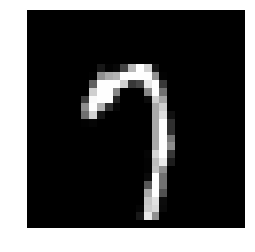

Predicted Digit : 9 , Actual Digit : 8
Posterior Probabilities : [[0, -4170.972945939559], [1, -4114.725836238323], [2, -4148.811883187311], [3, -4126.770218421258], [4, -4095.8014949909257], [5, -4135.42258028463], [6, -4162.220129835645], [7, -4086.3596740411294], [8, -4081.404147649684], [9, -4073.849368067802]]


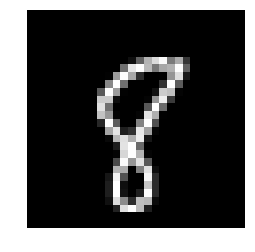

Predicted Digit : 8 , Actual Digit : 9
Posterior Probabilities : [[0, -4121.530953682986], [1, -4355.92842956844], [2, -4124.212280040015], [3, -4091.2303890009816], [4, -4155.848198232067], [5, -4119.2153919333205], [6, -4230.63348486469], [7, -4168.9133532057895], [8, -4089.7551812915012], [9, -4098.106690669574]]


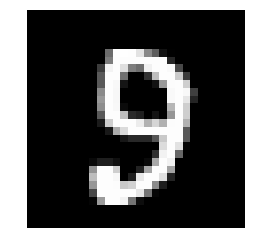

Predicted Digit : 1 , Actual Digit : 9
Posterior Probabilities : [[0, -4134.407178835841], [1, -4038.5336069907694], [2, -4092.429779446329], [3, -4110.366738743766], [4, -4064.7889591673793], [5, -4133.779509343512], [6, -4145.210317021215], [7, -4050.5351005362095], [8, -4065.7873974196095], [9, -4044.324935051058]]


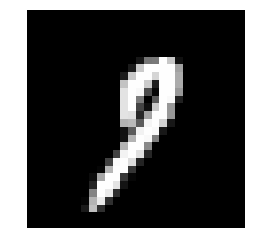

Predicted Digit : 4 , Actual Digit : 1
Posterior Probabilities : [[0, -4126.273469929265], [1, -4071.441824679192], [2, -4095.7920522704535], [3, -4107.092241898199], [4, -4070.208060047154], [5, -4124.501455837799], [6, -4122.1207302580615], [7, -4079.314174492619], [8, -4083.263930085341], [9, -4077.632512102092]]


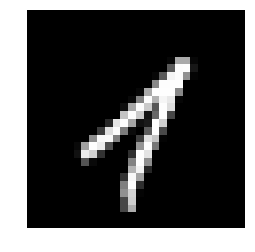

In [329]:
for idx,pred,pp in errs[0:5]:
    print("Predicted Digit : " + str(pred) + " , Actual Digit : " + str(test_labels[idx]));
    print("Posterior Probabilities : " + str(pp));
    displaychar(test_images[idx]);